[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

# Proje Özeti


- Bu projede, yaş aralığını ve cinsiyeti tahmin edebilen bir model geliştirilmiş ve canlı kamera akışı ile çalışan bir sistem haline getirilmiştir. 

- Model, kullanıcının yüzünü gerçek zamanlı olarak analiz ederek yaş ve cinsiyet tahmini yapmaktadır. 

- Projenin temel amacı, yüz tanıma teknolojisi kullanarak yaş ve cinsiyet sınıflandırmasını otomatik hale getirmek ve bu sınıflandırmayı gerçek zamanlı olarak gerçekleştirmektir.

# Model ve Sınıflar

- Model, toplamda 8 sınıfı tanımlayabilmektedir. Bu sınıflar, farklı yaş gruplarına ve cinsiyetlere göre ayrılmıştır:

AGE: 0-20 FEMALE

AGE: 0-20 MALE

AGE: 20-30 FEMALE

AGE: 20-30 MALE

AGE: 30-50 FEMALE

AGE: 30-50 MALE

AGE: 50++ FEMALE

AGE: 50++ MALE

# Doğruluk Oranı

- Modelin doğruluk oranı şu anda %40 (0.40 accuracy) seviyesindedir.

- Bu, modelin sınıflandırma yaparken zaman zaman hatalar yaptığı ve doğruluğunu artırmak için daha fazla iyileştirmeye ihtiyaç duyduğu anlamına gelmektedir. 

- Düşük doğruluk oranı, verisetinin kalitesi, modelin karmaşıklığı veya eğitim sürecinde kullanılan parametrelerden kaynaklanabilir.

### 💻 CLI

In [1]:
import cv2
from ultralytics import YOLO
import math
import torch
import numpy as np

In [2]:

# YOLOv8S modelini yükle
model = YOLO("best.pt")

# Class ID'leri isimlere eşle
class_names = {
    0: "AGE: 0-20 FEMALE",
    1: "AGE: 0-20 MALE",
    2: "AGE: 20-30 FEMALE",
    3: "AGE: 20-30 MALE",
    4: "AGE: 30-50 FEMALE",
    5: "AGE: 30-50 MALE",
    6: "AGE: 50++ FEMALE",
    7: "AGE: 50++ MALE"
}

def main():
    # Kamerayı başlat
    cap = cv2.VideoCapture(0)

    while True:
        # Kameradan bir çerçeve al
        ret, frame = cap.read()
        
        # Görüntüyü BGR'den RGB'ye dönüştür
        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Tespitleri yap
        results = model(img_rgb)

        # Her tespit edilen nesne için dikdörtgen çiz
        for result in results:
            boxes = result.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                conf = box.conf.item()
                cls = box.cls.item()
                class_name = class_names.get(cls, "Unknown")
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                label = f'{class_name}: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Görseli ekranda göster
        cv2.imshow('YOLOv8S Object Detection', frame)

        # Çıkış için 'q' tuşuna basılmasını kontrol et
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Kamerayı serbest bırak
    cap.release()

    # Pencereleri kapat
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()



0: 480x640 1 AGE- 20-30 MALE, 1 AGE- 30-50 FEMALE, 1 AGE- 30-50 MALE, 267.8ms
Speed: 3.0ms preprocess, 267.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 AGE- 20-30 MALE, 254.0ms
Speed: 2.0ms preprocess, 254.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 AGE- 20-30 MALE, 221.9ms
Speed: 4.0ms preprocess, 221.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 AGE- 20-30 MALE, 227.8ms
Speed: 2.1ms preprocess, 227.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 AGE- 20-30 MALE, 237.7ms
Speed: 2.0ms preprocess, 237.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 AGE- 20-30 MALE, 213.9ms
Speed: 1.0ms preprocess, 213.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 AGE- 20-30 MALE, 199.7ms
Speed: 2.0ms preprocess, 199.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



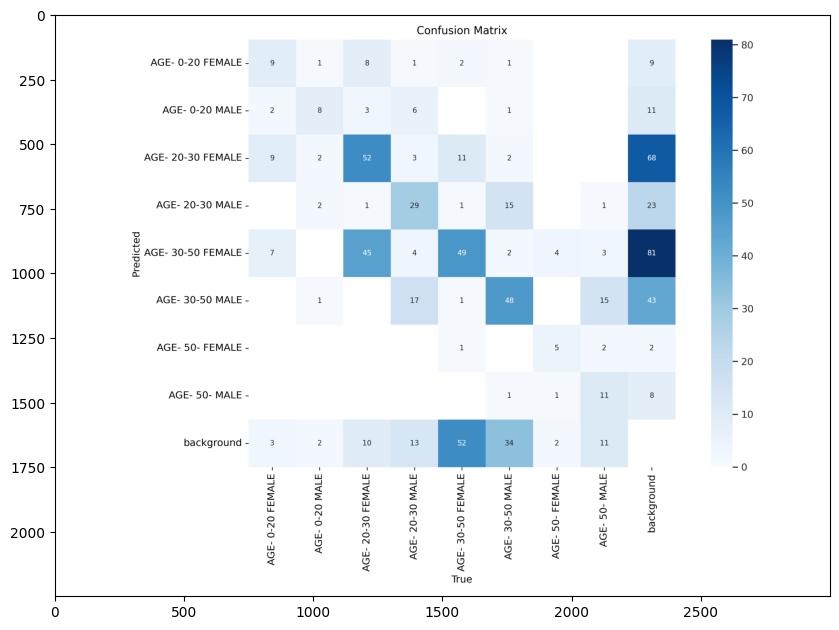

In [13]:
output_2 = datadir +'/predict'+ '/output_1.png'
output_2 = imread(output_2)
plt.figure(figsize=(10, 10))  
plt.imshow(output_2)

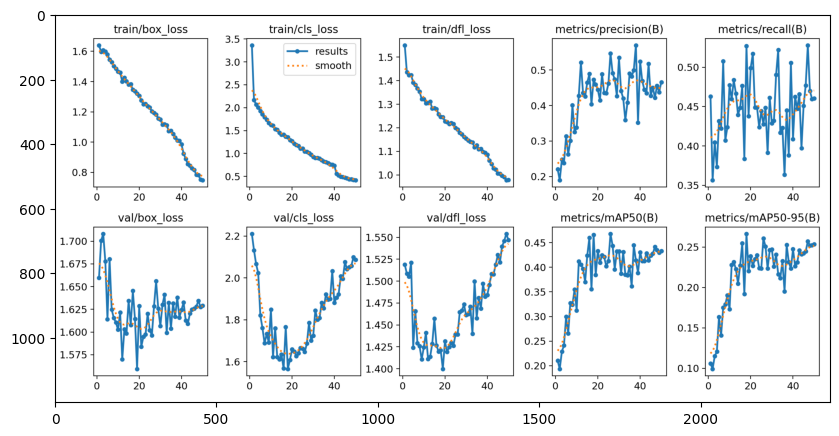

In [14]:
output_1 = datadir +'/predict'+ '/output.png'
output_1 = imread(output_1)
plt.figure(figsize=(10, 10))  
plt.imshow(output_1)

# Let's take a look at few results.

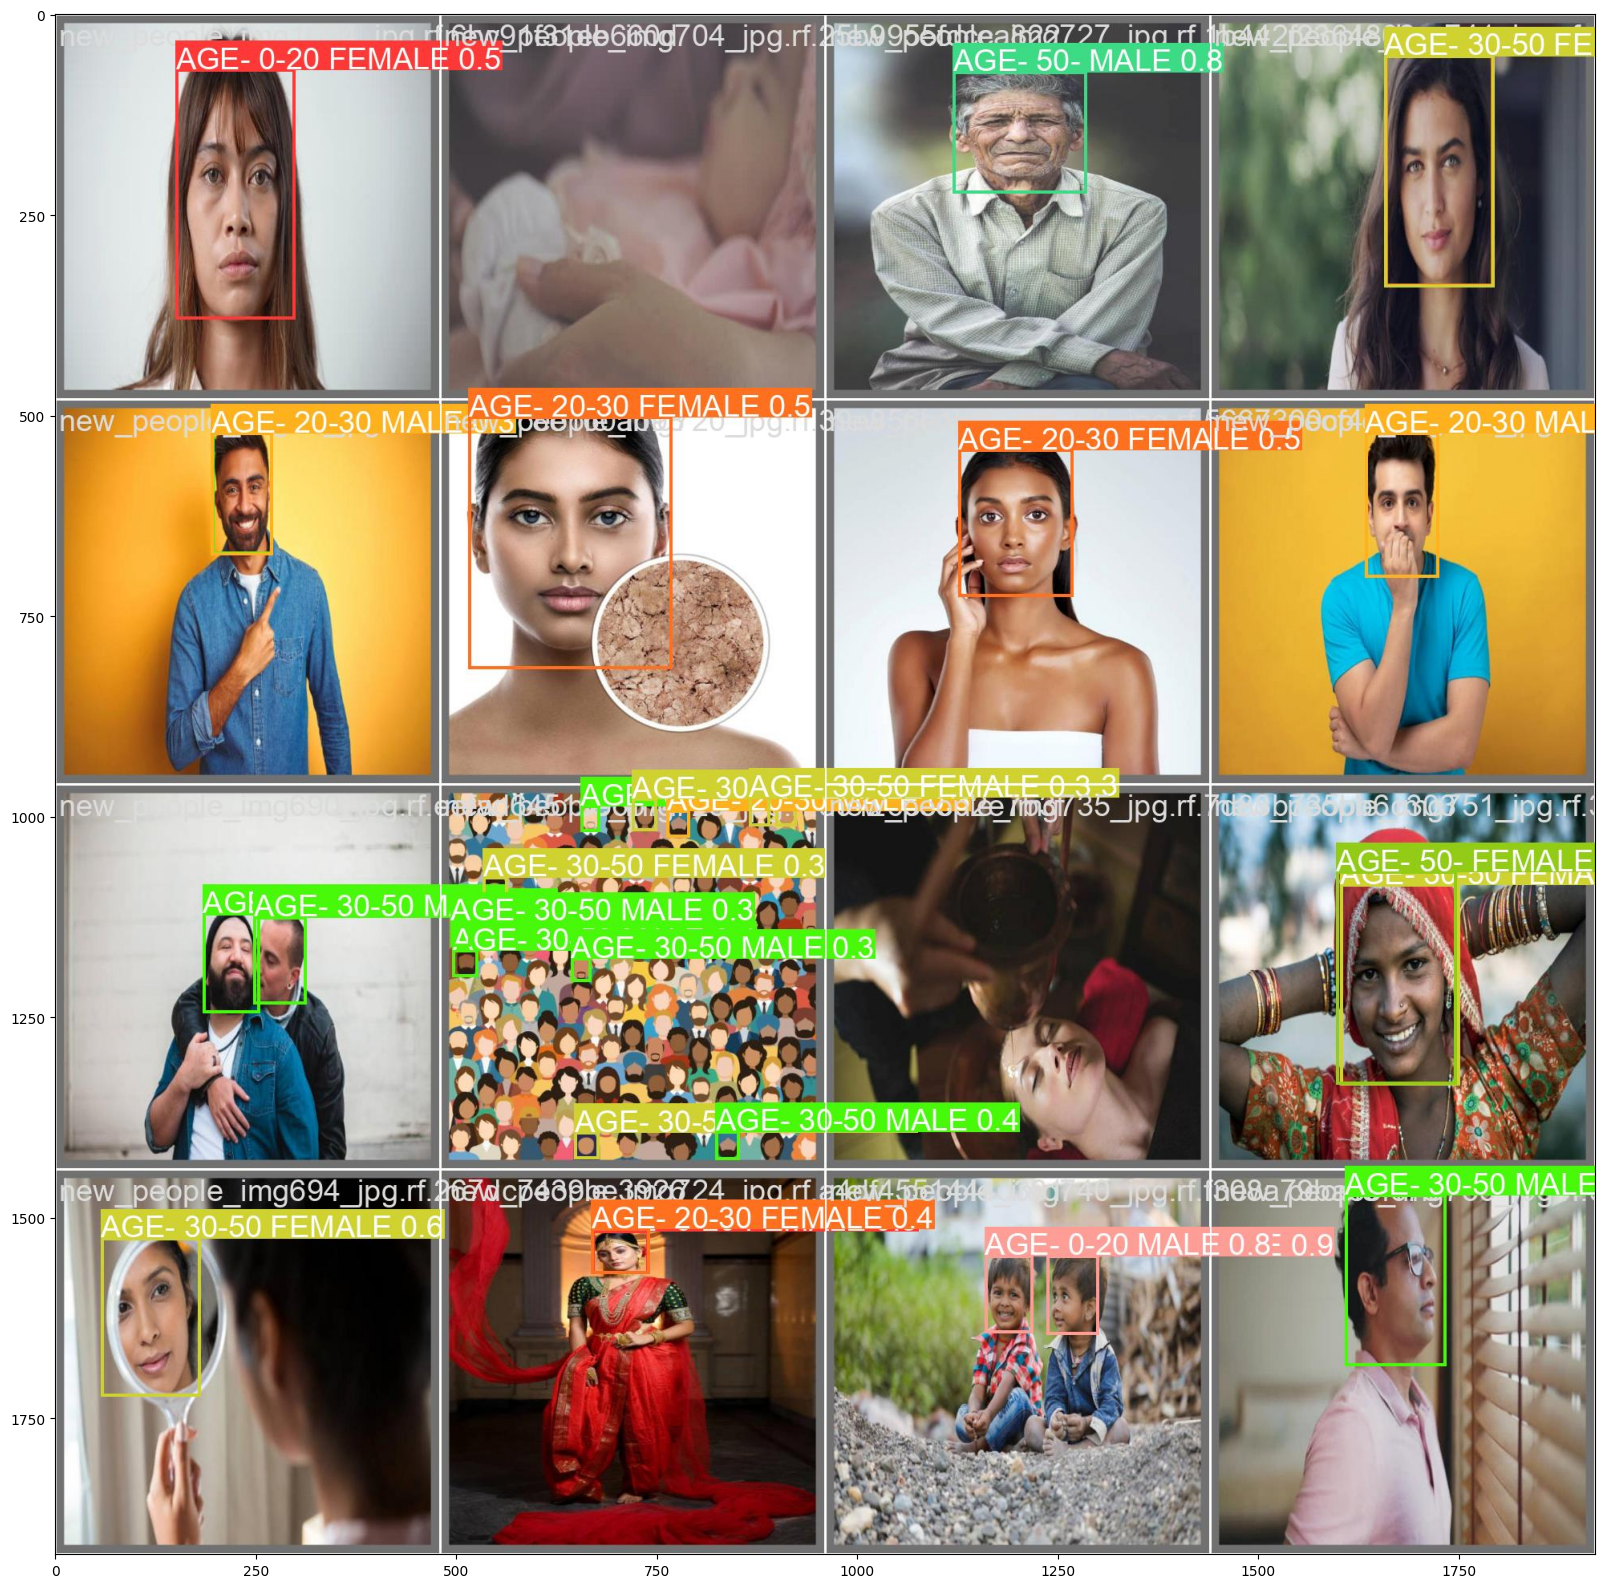

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

datadir = 'C:/Users/tr_co/OneDrive/Masaüstü/gender'
predict_1 = datadir +'/predict'+ '/predick_1.jpeg'

plt.figure(figsize=(20, 20))  



predict_1 = imread(predict_1)
plt.imshow(predict_1)


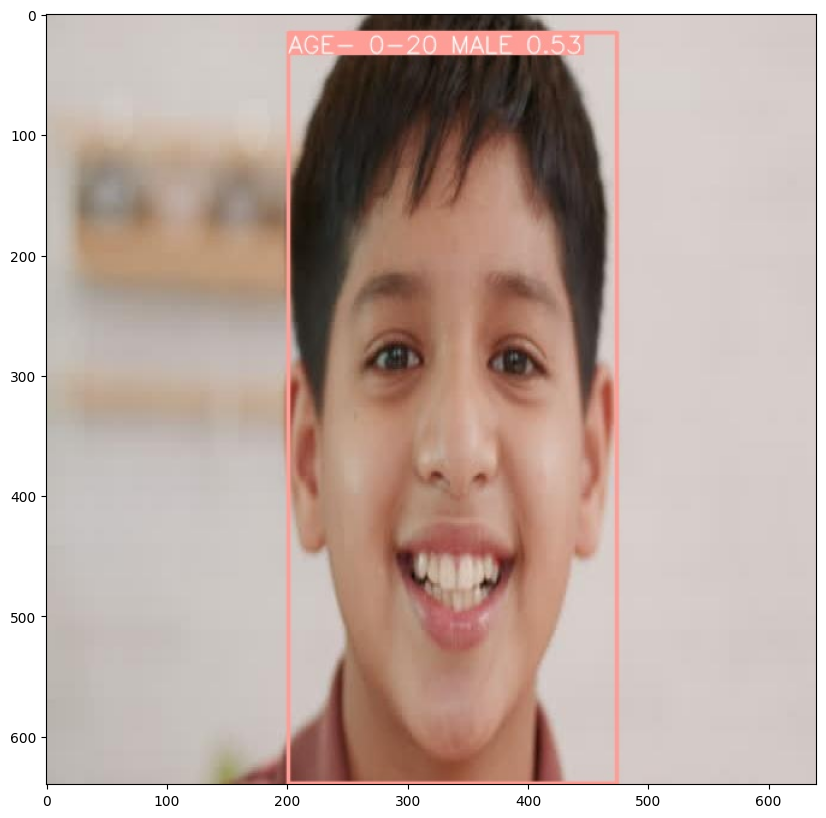

In [7]:

predict_2 = datadir +'/predict'+ '/predick_2.jpeg'
predict_2 = imread(predict_2)
plt.figure(figsize=(10, 10))  
plt.imshow(predict_2)


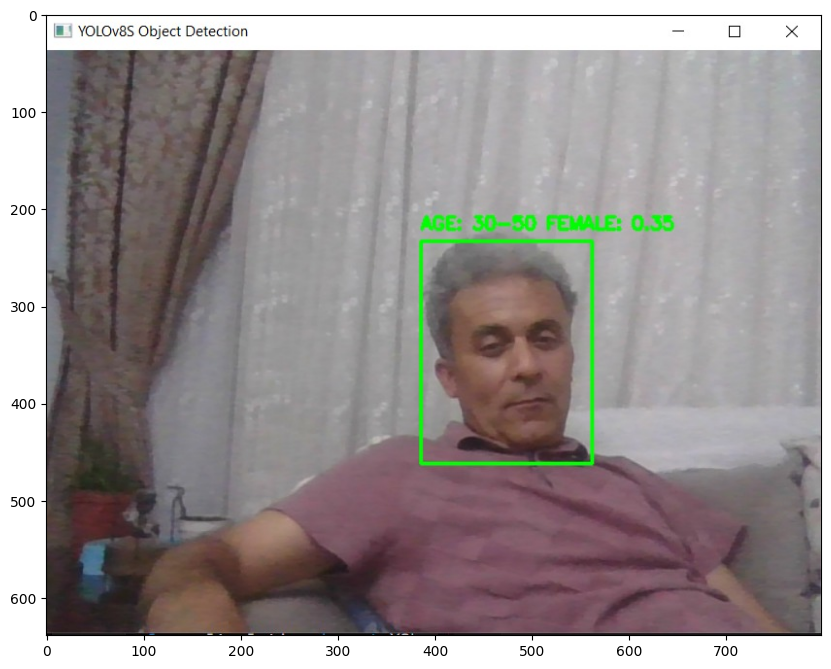

In [6]:
predict_3 = datadir +'/predict'+ '/predick_3.jpeg'
predict_3 = imread(predict_3)
plt.figure(figsize=(10, 10))  
plt.imshow(predict_3)

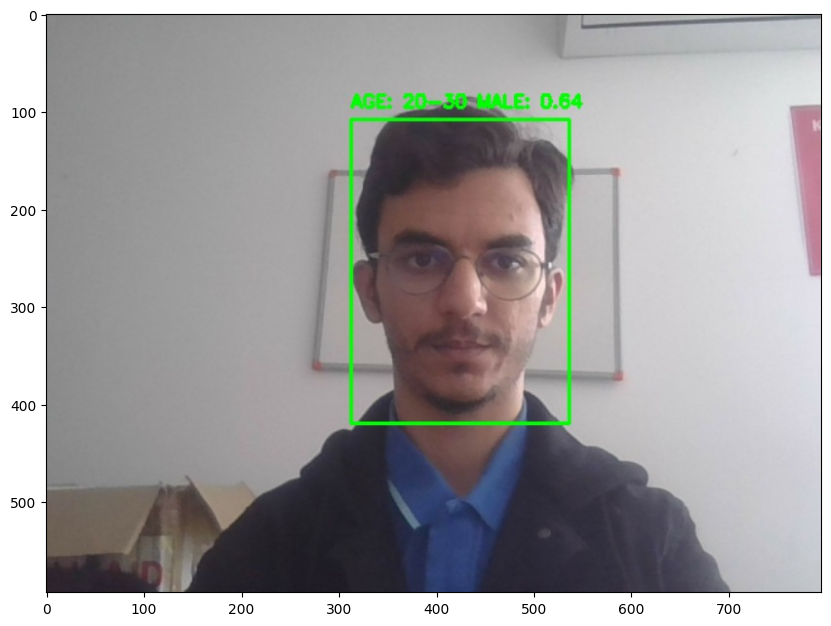

In [8]:
predict_4 = datadir +'/predict'+ '/predick_4.jpeg'
predict_4 = imread(predict_4)
plt.figure(figsize=(10, 10))  
plt.imshow(predict_4)

https://github.com/bilrein


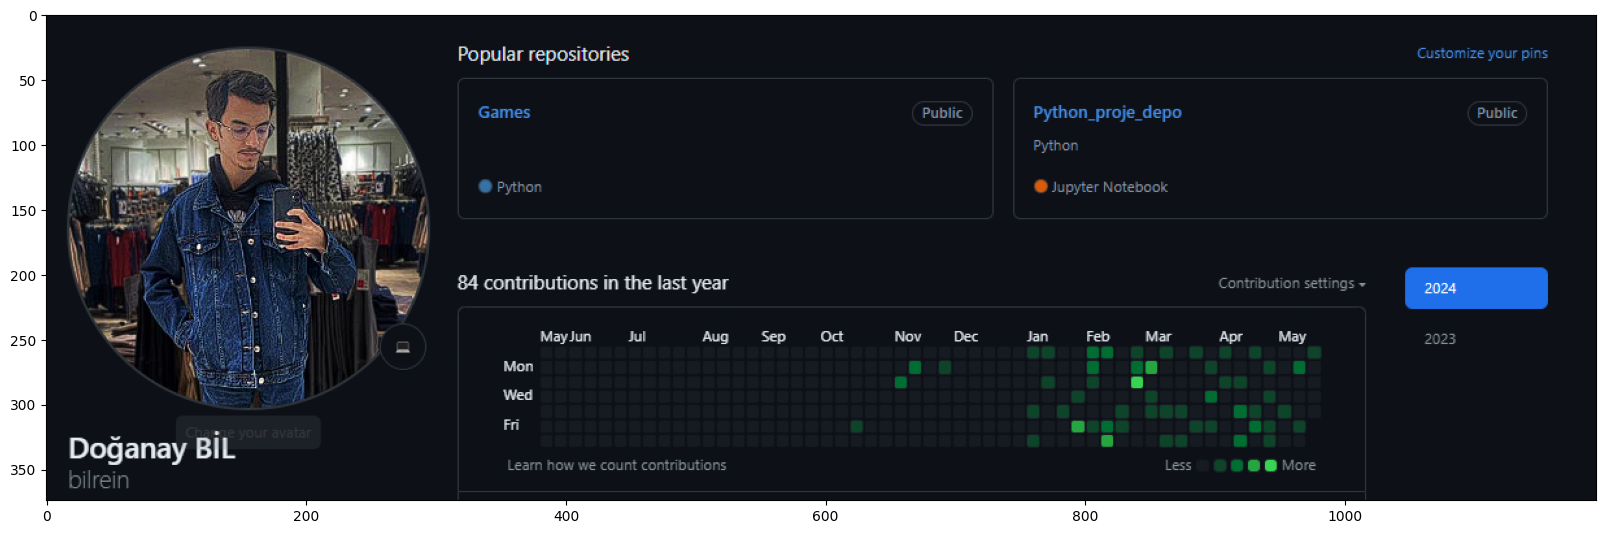

In [19]:
github = 'github.PNG'
github = imread(github)
plt.figure(figsize=(20, 10))  
plt.imshow(github)
hithub_addres = "https://github.com/bilrein"
print(hithub_addres)

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.